In [241]:
# import packages

import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.svm import OneClassSVM
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import spacy


In [242]:
# loading the data

df = pd.read_csv('../data/spotify_dataset.csv')




In [243]:
# Initial overview
print("Shape of the dataset:", df.shape)

Shape of the dataset: (114000, 21)


In [244]:
# check for missing values
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [245]:
# check for duplicates

print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [246]:
# show columns datatypes
print("Data types of columns:\n", df.dtypes)


Data types of columns:
 Unnamed: 0            int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object


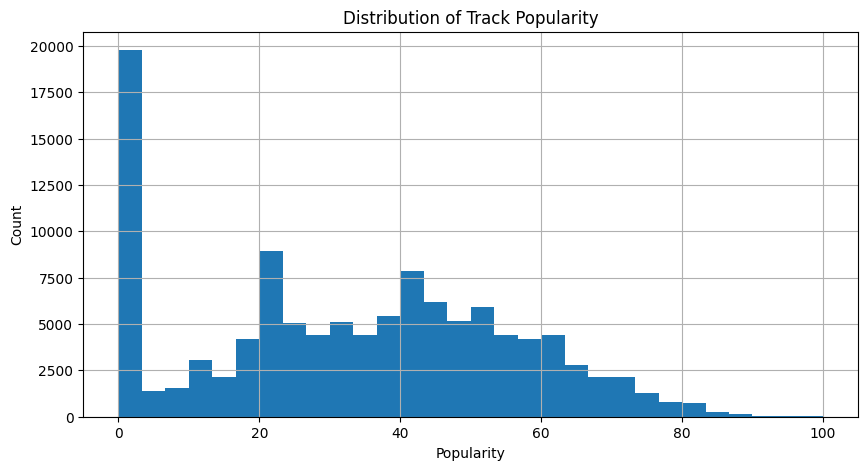

In [247]:
# plot popularity
plt.figure(figsize=(10, 5))
df['popularity'].hist(bins=30)
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()

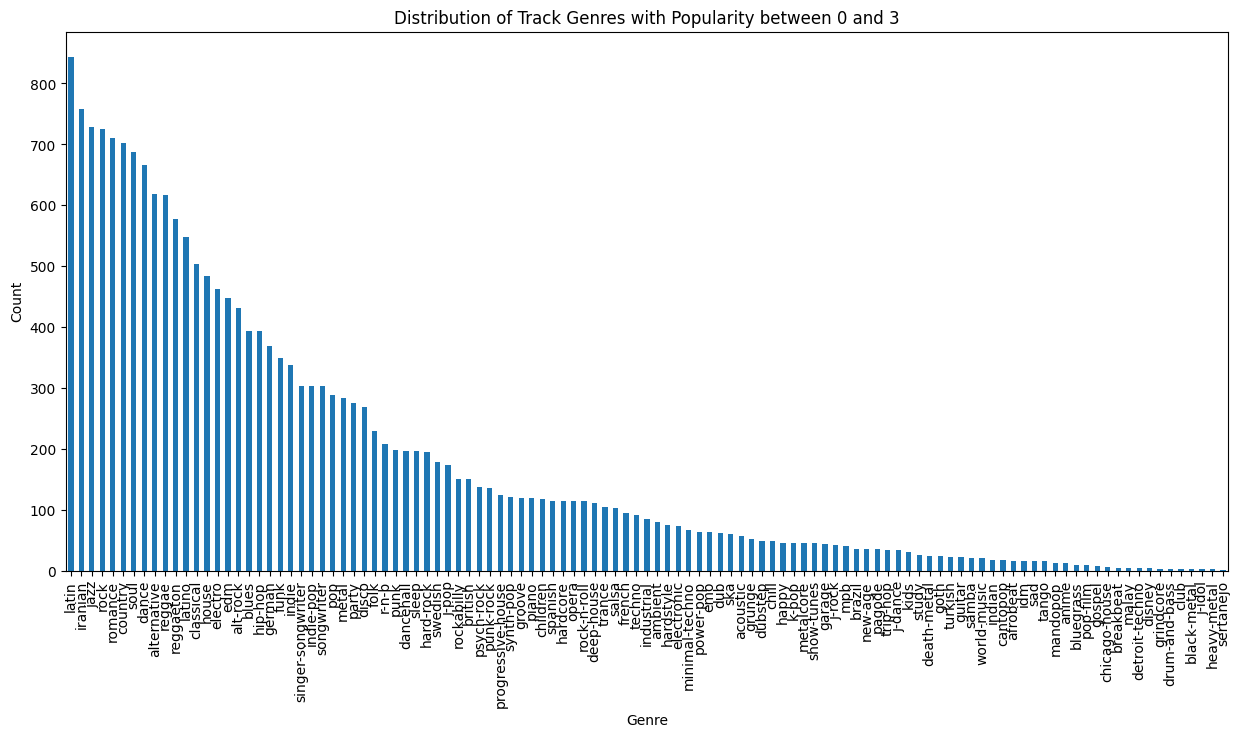

In [248]:

# plot track genre
plt.figure(figsize=(15, 7))
low_popularity['track_genre'].value_counts().plot(kind='bar')
plt.title('Distribution of Track Genres with Popularity between 0 and 3')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()


In [249]:
# create a feature to indicate if a track has a popularity between 0 and 3

df['low_popularity'] = df['popularity'].apply(lambda x: 1 if x <= 3 else 0)


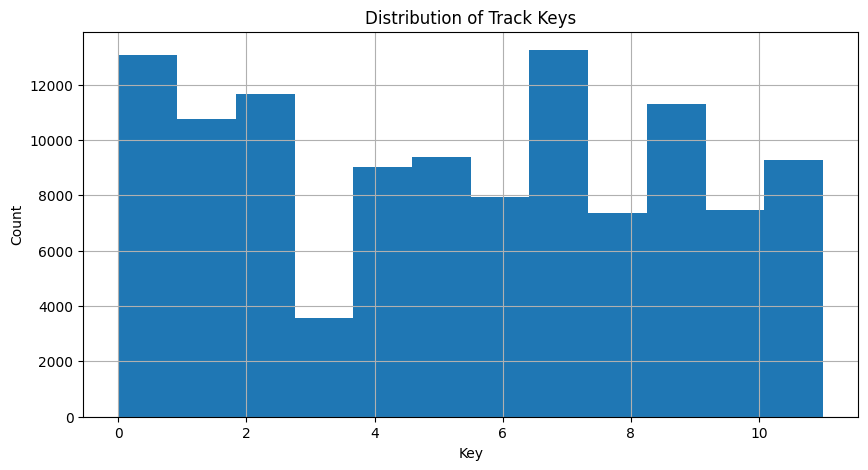

In [250]:
# plot key
plt.figure(figsize=(10, 5))
df['key'].hist(bins=12)
plt.title('Distribution of Track Keys')
plt.xlabel('Key')
plt.ylabel('Count')
plt.show()

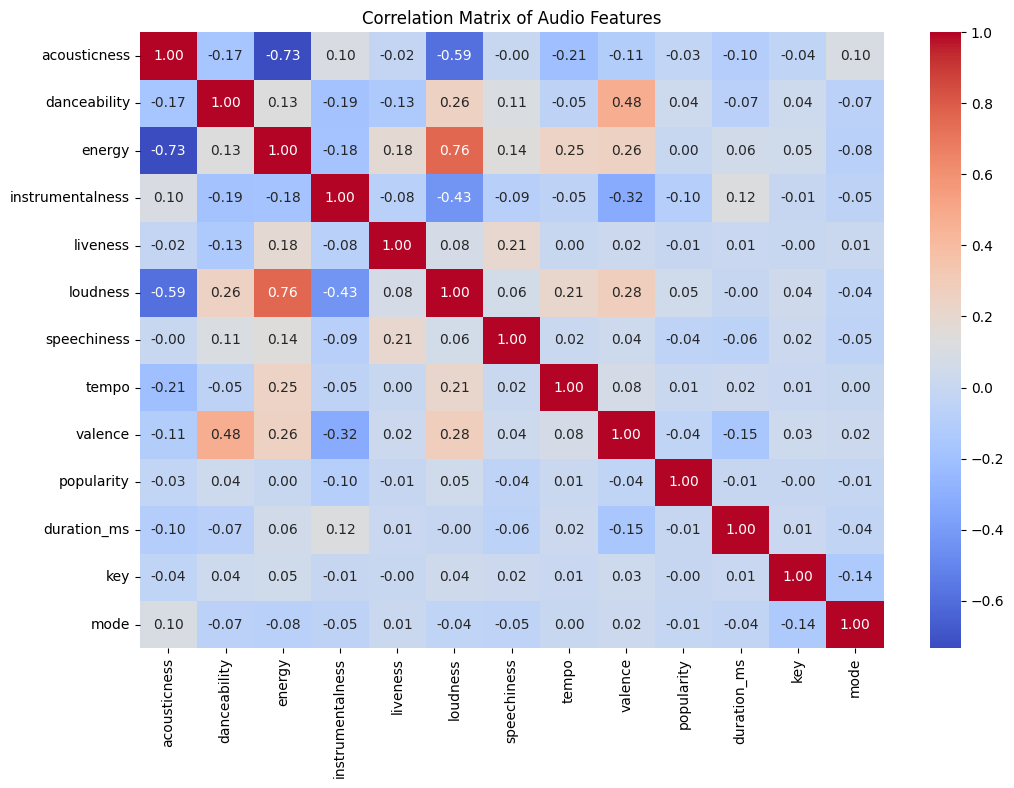

In [251]:
# Check correlation of features
correlation_columns = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity', 'duration_ms', 'key', 'mode']
corr_matrix = df[correlation_columns].corr()

# Plot heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Audio Features')
plt.show()


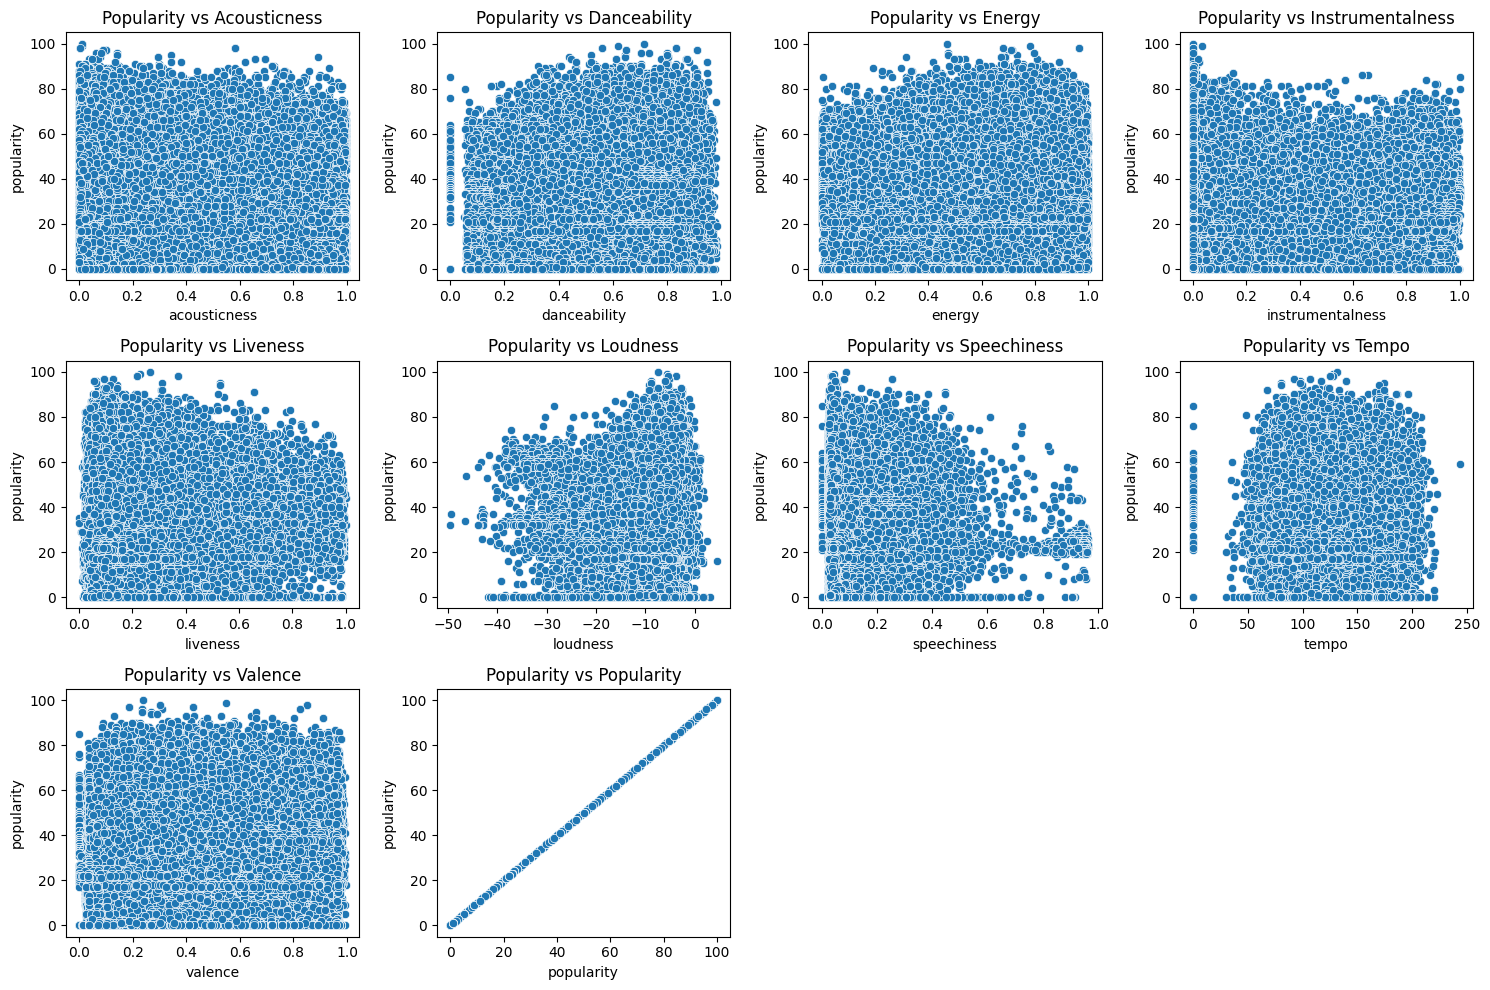

In [252]:
# Explore the relationship between popularity and other features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(correlation_columns[:-3]):
    plt.subplot(3, 4, i+1)
    sns.scatterplot(data=df, x=feature, y='popularity')
    plt.title(f'Popularity vs {feature.capitalize()}')
    plt.tight_layout()
plt.show()

In [253]:
# create a feature to indicate if a track has a tempo between 0 and 3

df['low_tempo'] = df['tempo'].apply(lambda x: 1 if x <= 3 else 0)

/var/folders/v_/7z4n35656tv4p527k7lx_5900000gn/T/ipykernel_48957/1884726219.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['tempo'], shade=True)


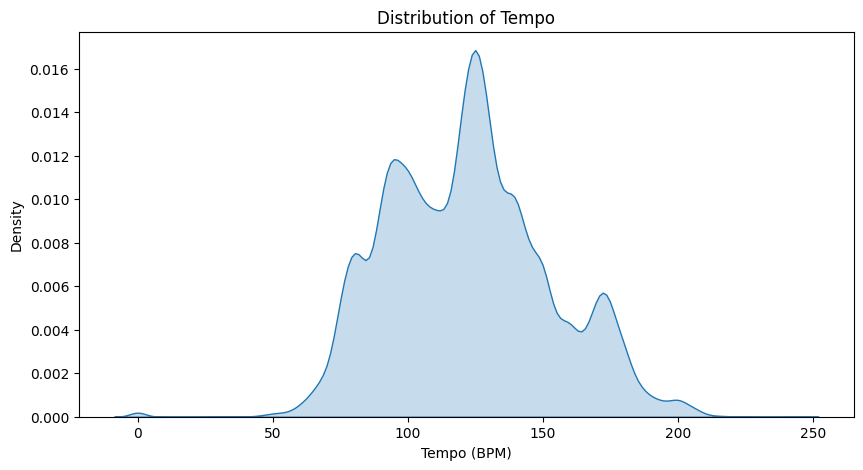

In [254]:
# Plot distribution of tempo
plt.figure(figsize=(10, 5))
sns.kdeplot(df['tempo'], shade=True)
plt.title('Distribution of Tempo')
plt.xlabel('Tempo (BPM)')
plt.ylabel('Density')
plt.show()


In [255]:
# create a feature to indicate wheteher  atrack falls into the category of a tempo between 125 and 140

df['common_tempo'] = df['tempo'].apply(lambda x: 1 if 125 <= x <= 140 else 0)

/var/folders/v_/7z4n35656tv4p527k7lx_5900000gn/T/ipykernel_48957/629206782.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['duration_ms'], shade=True)


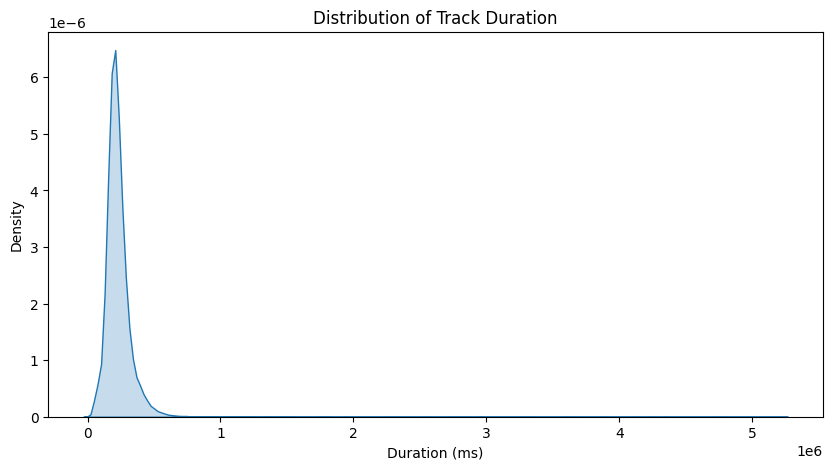

In [256]:
# Plot distribution of duration
plt.figure(figsize=(10, 5))
sns.kdeplot(df['duration_ms'], shade=True)
plt.title('Distribution of Track Duration')
plt.xlabel('Duration (ms)')
plt.ylabel('Density')
plt.show()

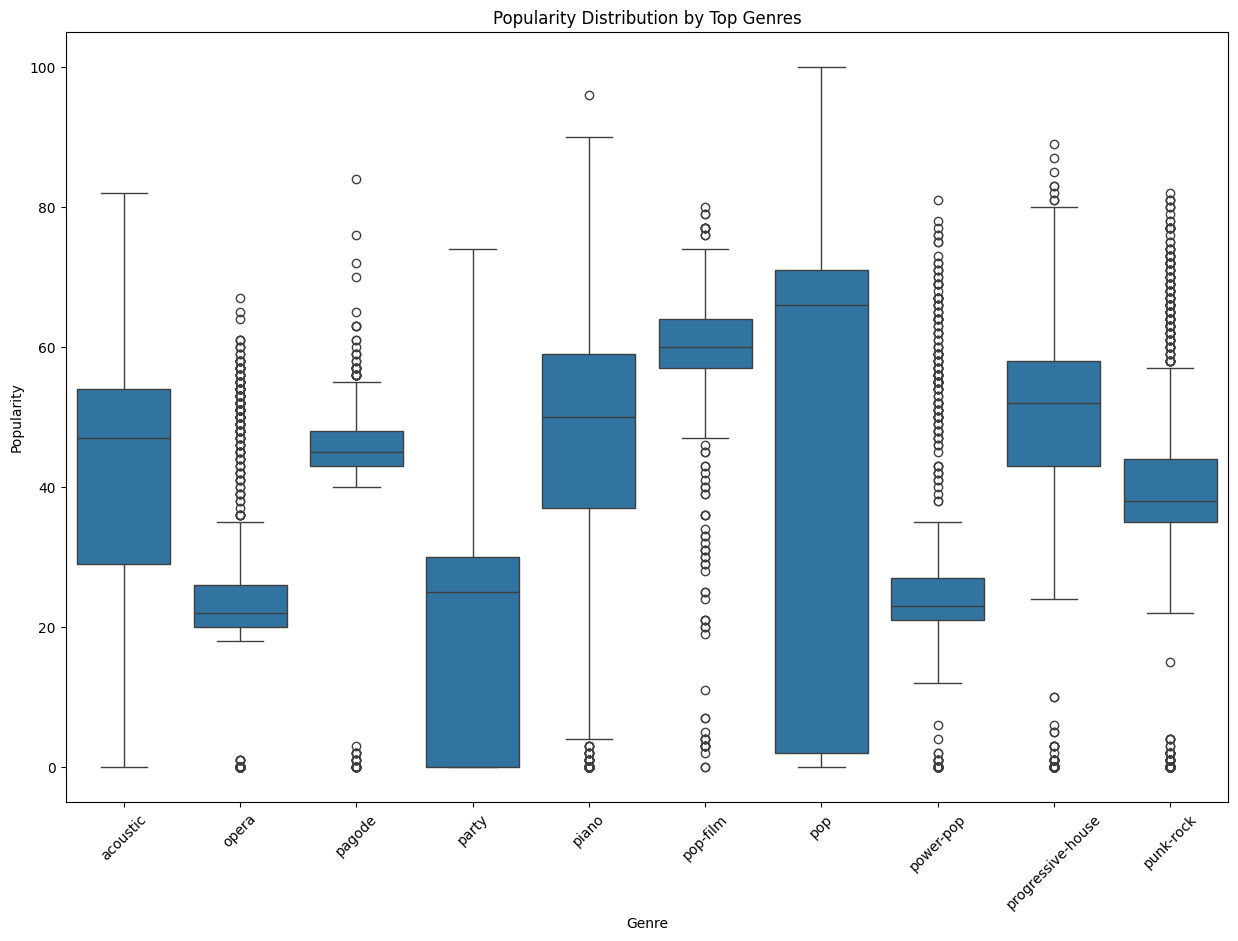

In [257]:
# Explore genre distribution by popularity
top_genres = df['track_genre'].value_counts().nlargest(10).index
df_top_genres = df[df['track_genre'].isin(top_genres)]
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_top_genres, x='track_genre', y='popularity')
plt.title('Popularity Distribution by Top Genres')
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.xticks(rotation=45)
plt.show()

In [258]:
# Creating a new feature 'tempo_range'
df['tempo_range'] = pd.cut(df['tempo'], bins=[0, 60, 120, 180, 240], labels=['Slow', 'Medium', 'Fast', 'Very Fast'])


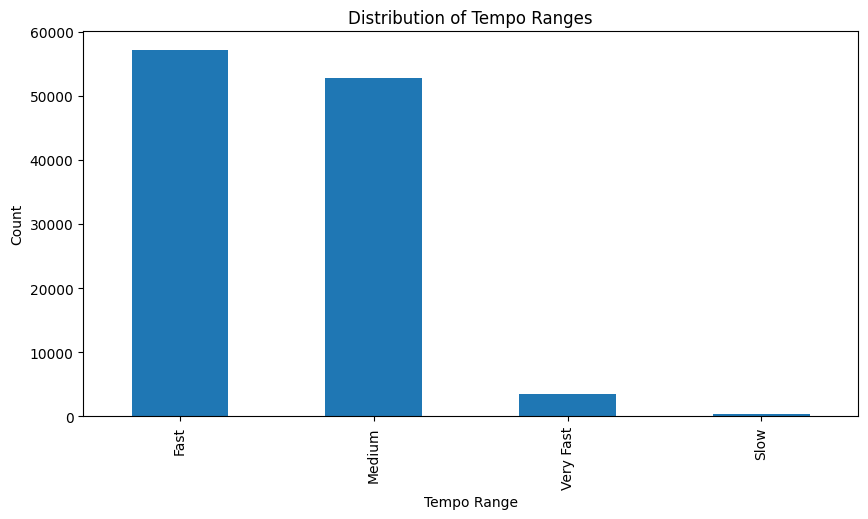

In [259]:
# Plot tempo range distribution
plt.figure(figsize=(10, 5))
df['tempo_range'].value_counts().plot(kind='bar')
plt.title('Distribution of Tempo Ranges')
plt.xlabel('Tempo Range')
plt.ylabel('Count')
plt.show()

In [196]:
# Summary statistics for numerical features
print("Summary statistics for numerical features:\n", df.describe())

Summary statistics for numerical features:
           Unnamed: 0     popularity   duration_ms   danceability  \
count  114000.000000  114000.000000  1.140000e+05  114000.000000   
mean    56999.500000      33.238535  2.280292e+05       0.566800   
std     32909.109681      22.305078  1.072977e+05       0.173542   
min         0.000000       0.000000  0.000000e+00       0.000000   
25%     28499.750000      17.000000  1.740660e+05       0.456000   
50%     56999.500000      35.000000  2.129060e+05       0.580000   
75%     85499.250000      50.000000  2.615060e+05       0.695000   
max    113999.000000     100.000000  5.237295e+06       0.985000   

              energy            key       loudness           mode  \
count  114000.000000  114000.000000  114000.000000  114000.000000   
mean        0.641383       5.309140      -8.258960       0.637553   
std         0.251529       3.559987       5.029337       0.480709   
min         0.000000       0.000000     -49.531000       0.000000  

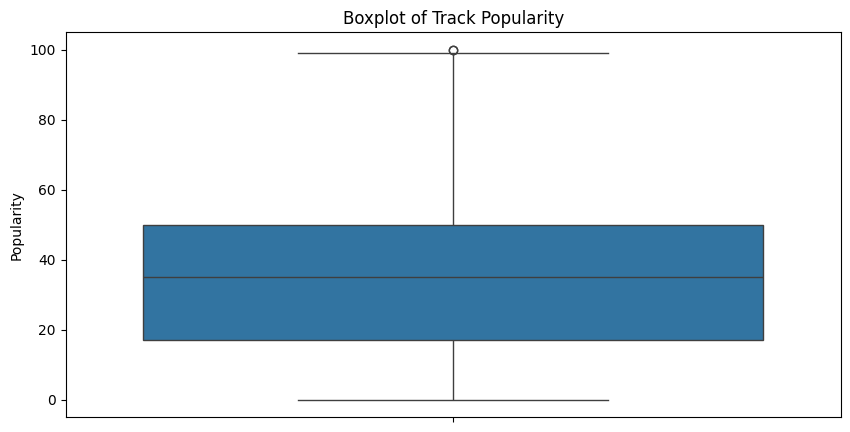

In [261]:
# Check for outliers in the popularity feature using boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, y='popularity')
plt.title('Boxplot of Track Popularity')
plt.ylabel('Popularity')
plt.show()

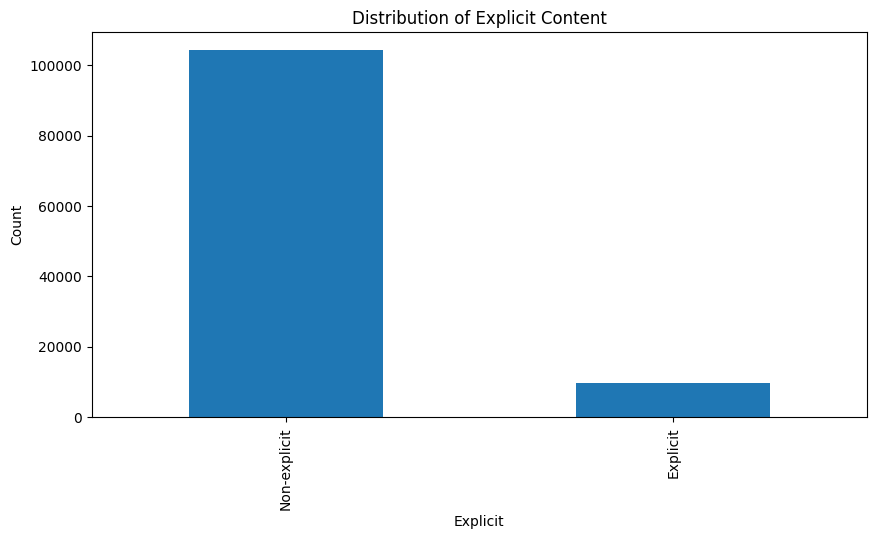

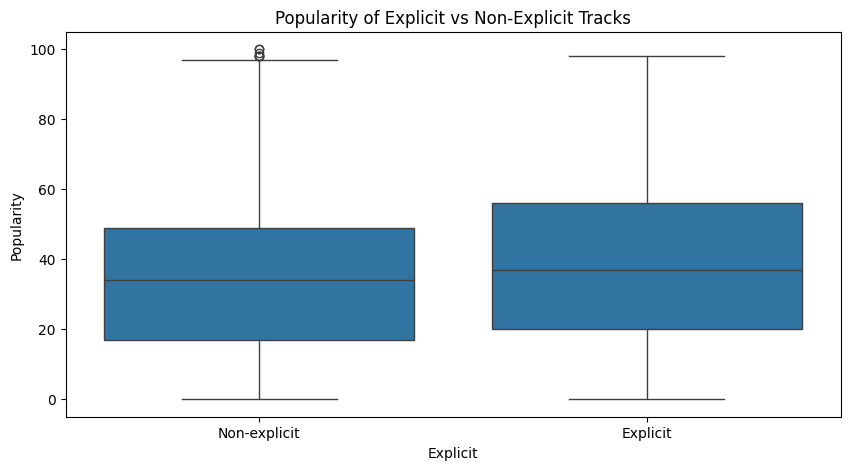

In [263]:
# Analyze distribution of explicit content
plt.figure(figsize=(10, 5))
df['explicit'].value_counts().plot(kind='bar')
plt.title('Distribution of Explicit Content')
plt.xlabel('Explicit')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-explicit', 'Explicit'])
plt.show()

# Compare popularity of explicit vs non-explicit tracks
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='explicit', y='popularity')
plt.title('Popularity of Explicit vs Non-Explicit Tracks')
plt.xlabel('Explicit')
plt.ylabel('Popularity')
plt.xticks(ticks=[0, 1], labels=['Non-explicit', 'Explicit'])
plt.show()


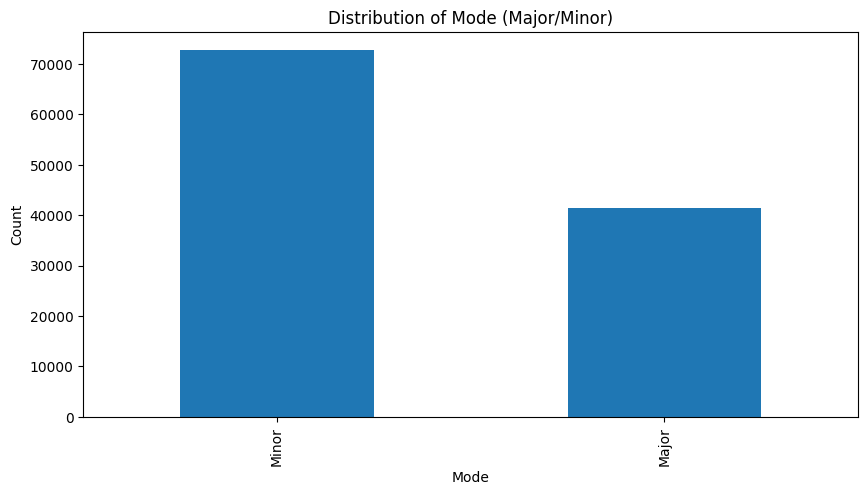

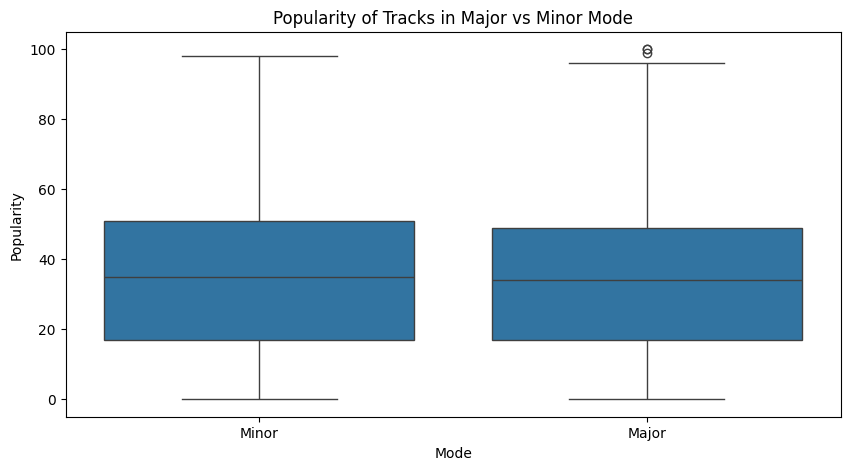

In [264]:
# Analyze distribution of mode (major/minor)
plt.figure(figsize=(10, 5))
df['mode'].value_counts().plot(kind='bar')
plt.title('Distribution of Mode (Major/Minor)')
plt.xlabel('Mode')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Minor', 'Major'])
plt.show()

# Compare popularity of tracks in major vs minor mode
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='mode', y='popularity')
plt.title('Popularity of Tracks in Major vs Minor Mode')
plt.xlabel('Mode')
plt.ylabel('Popularity')
plt.xticks(ticks=[0, 1], labels=['Minor', 'Major'])
plt.show()


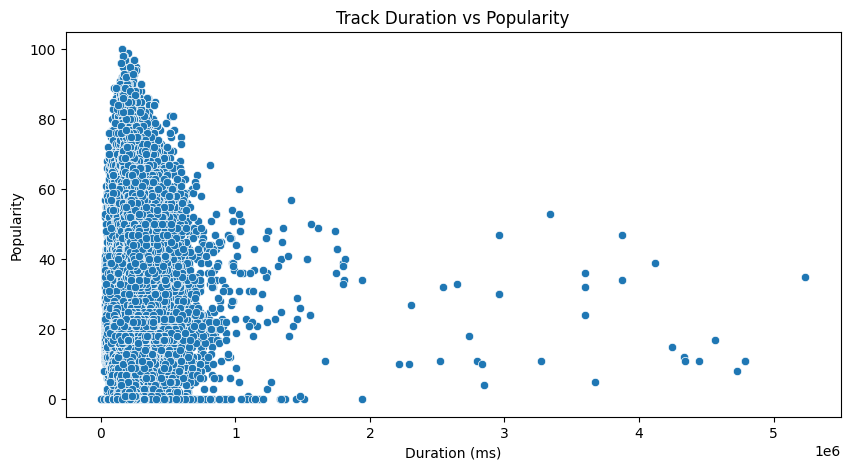

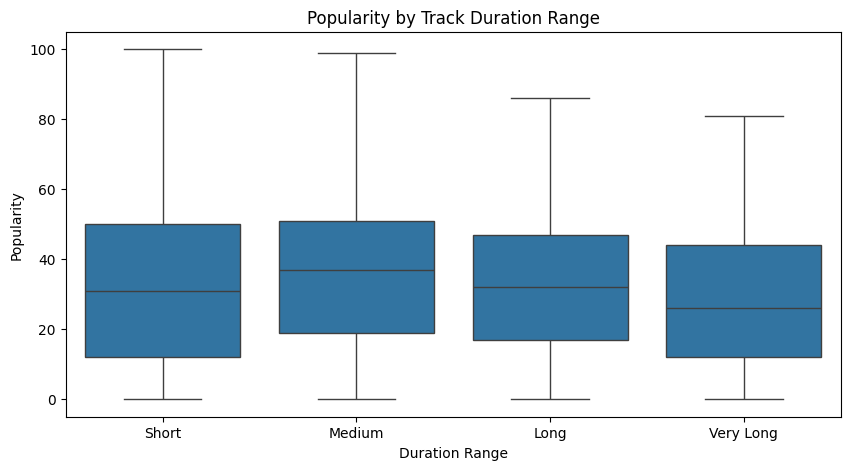

In [265]:
# Scatter plot of duration vs popularity
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='duration_ms', y='popularity')
plt.title('Track Duration vs Popularity')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.show()

# Categorize track durations into bins and analyze popularity
df['duration_range'] = pd.cut(df['duration_ms'], bins=[0, 180000, 300000, 420000, np.inf], labels=['Short', 'Medium', 'Long', 'Very Long'])

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='duration_range', y='popularity')
plt.title('Popularity by Track Duration Range')
plt.xlabel('Duration Range')
plt.ylabel('Popularity')
plt.show()


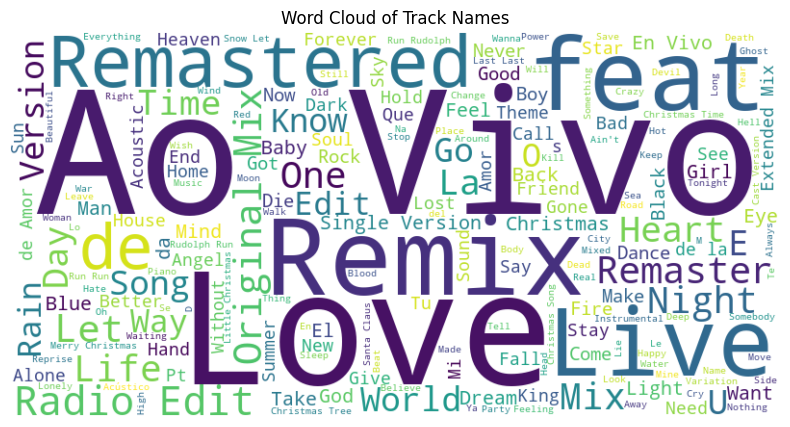

In [266]:
from wordcloud import WordCloud

# track_names as a string



# Generate a word cloud of track names 
track_names = ' '.join(df['track_name'].astype(str).values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(track_names)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Track Names')
plt.show()



In [267]:
# employ K-Means clustering to group similar track names

# Load Spacy model
nlp = spacy.load('en_core_web_md')

# Preprocess track names
track_names = df['track_name'].astype(str).values

# Vectorize the track names using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer.fit_transform(track_names)

# Define a function to compute the average word vectors using Spacy
def get_avg_word_vector(text, nlp_model):
    doc = nlp_model(text)
    vectors = [token.vector for token in doc if token.has_vector]
    return np.mean(vectors, axis=0) if vectors else np.zeros(nlp_model.vocab.vectors_length)

# Compute average word vectors for each track name
X_word_vectors = np.array([get_avg_word_vector(name, nlp) for name in track_names])

# Apply K-Means clustering
num_clusters = 5  # You can change this number based on your needs
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_word_vectors)

# Assign clusters to each track name
df['cluster'] = kmeans.labels_

# Print some example clusters
for cluster in range(num_clusters):
    print(f"Cluster {cluster}:")
    print(df[df['cluster'] == cluster]['track_name'].head(10).values)
    print()


Cluster 0:
['Falling in Love at a Coffee Shop' 'Winter Wonderland'
 'Winter Wonderland' 'Winter Wonderland' 'Winter Wonderland'
 'Winter Wonderland' 'Party of One' 'Party of One' 'Party of One'
 'Lonely This Christmas']

Cluster 1:
['Chi Mai' 'Mujer con Abanico' "C'est si bon" 'Asan Ka Na Ba' 'Koi'
 "Paano Ang Simbang Gabi - Kung 'Di Ka Katabi" 'Di Papakawalan' 'Tama Na'
 'Ikaw Lamang' 'Cortes de Aragón']

Cluster 2:
['Days I Will Remember' 'Say Something' "I'm Yours" 'Hunger'
 "I Won't Give Up" "I'm Yours" 'Say Something' 'If It Kills Me'
 'All I Want For Christmas Is A Real Good Tan' "When You're Wrong"]

Cluster 3:
['Ghost - Acoustic' 'Solo' 'Hold On - Remix' 'ily (i love you baby)'
 'Photograph' '93 Million Miles' 'Unlonely' 'Bella Luna'
 'Trampoline - Acoustic' '透明だった世界']

Cluster 4:
['Comedy' 'To Begin Again' "Can't Help Falling In Love" 'Hold On' 'Lucky'
 'Give Me Your Forever' 'Bad Liar' 'At My Worst' 'Lucky' 'Demons']



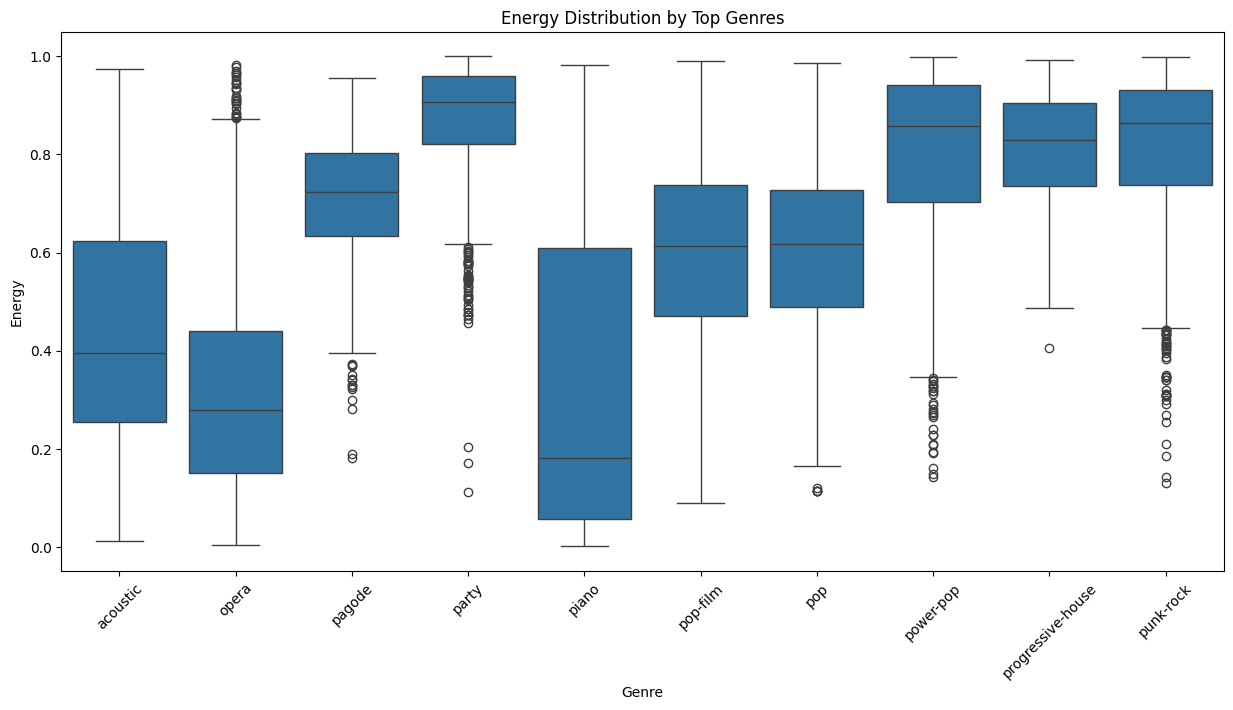

In [268]:
# Compare energy distribution across different genres
plt.figure(figsize=(15, 7))
sns.boxplot(data=df_top_genres, x='track_genre', y='energy')
plt.title('Energy Distribution by Top Genres')
plt.xlabel('Genre')
plt.ylabel('Energy')
plt.xticks(rotation=45)
plt.show()


In [269]:
# create a feature to indicate whether a track is punk-rock with high energy

df['punk_rock'] = df.apply(lambda x: 1 if x['track_genre'] == 'punk-rock' and x['energy'] > 0.8 else 0, axis=1)

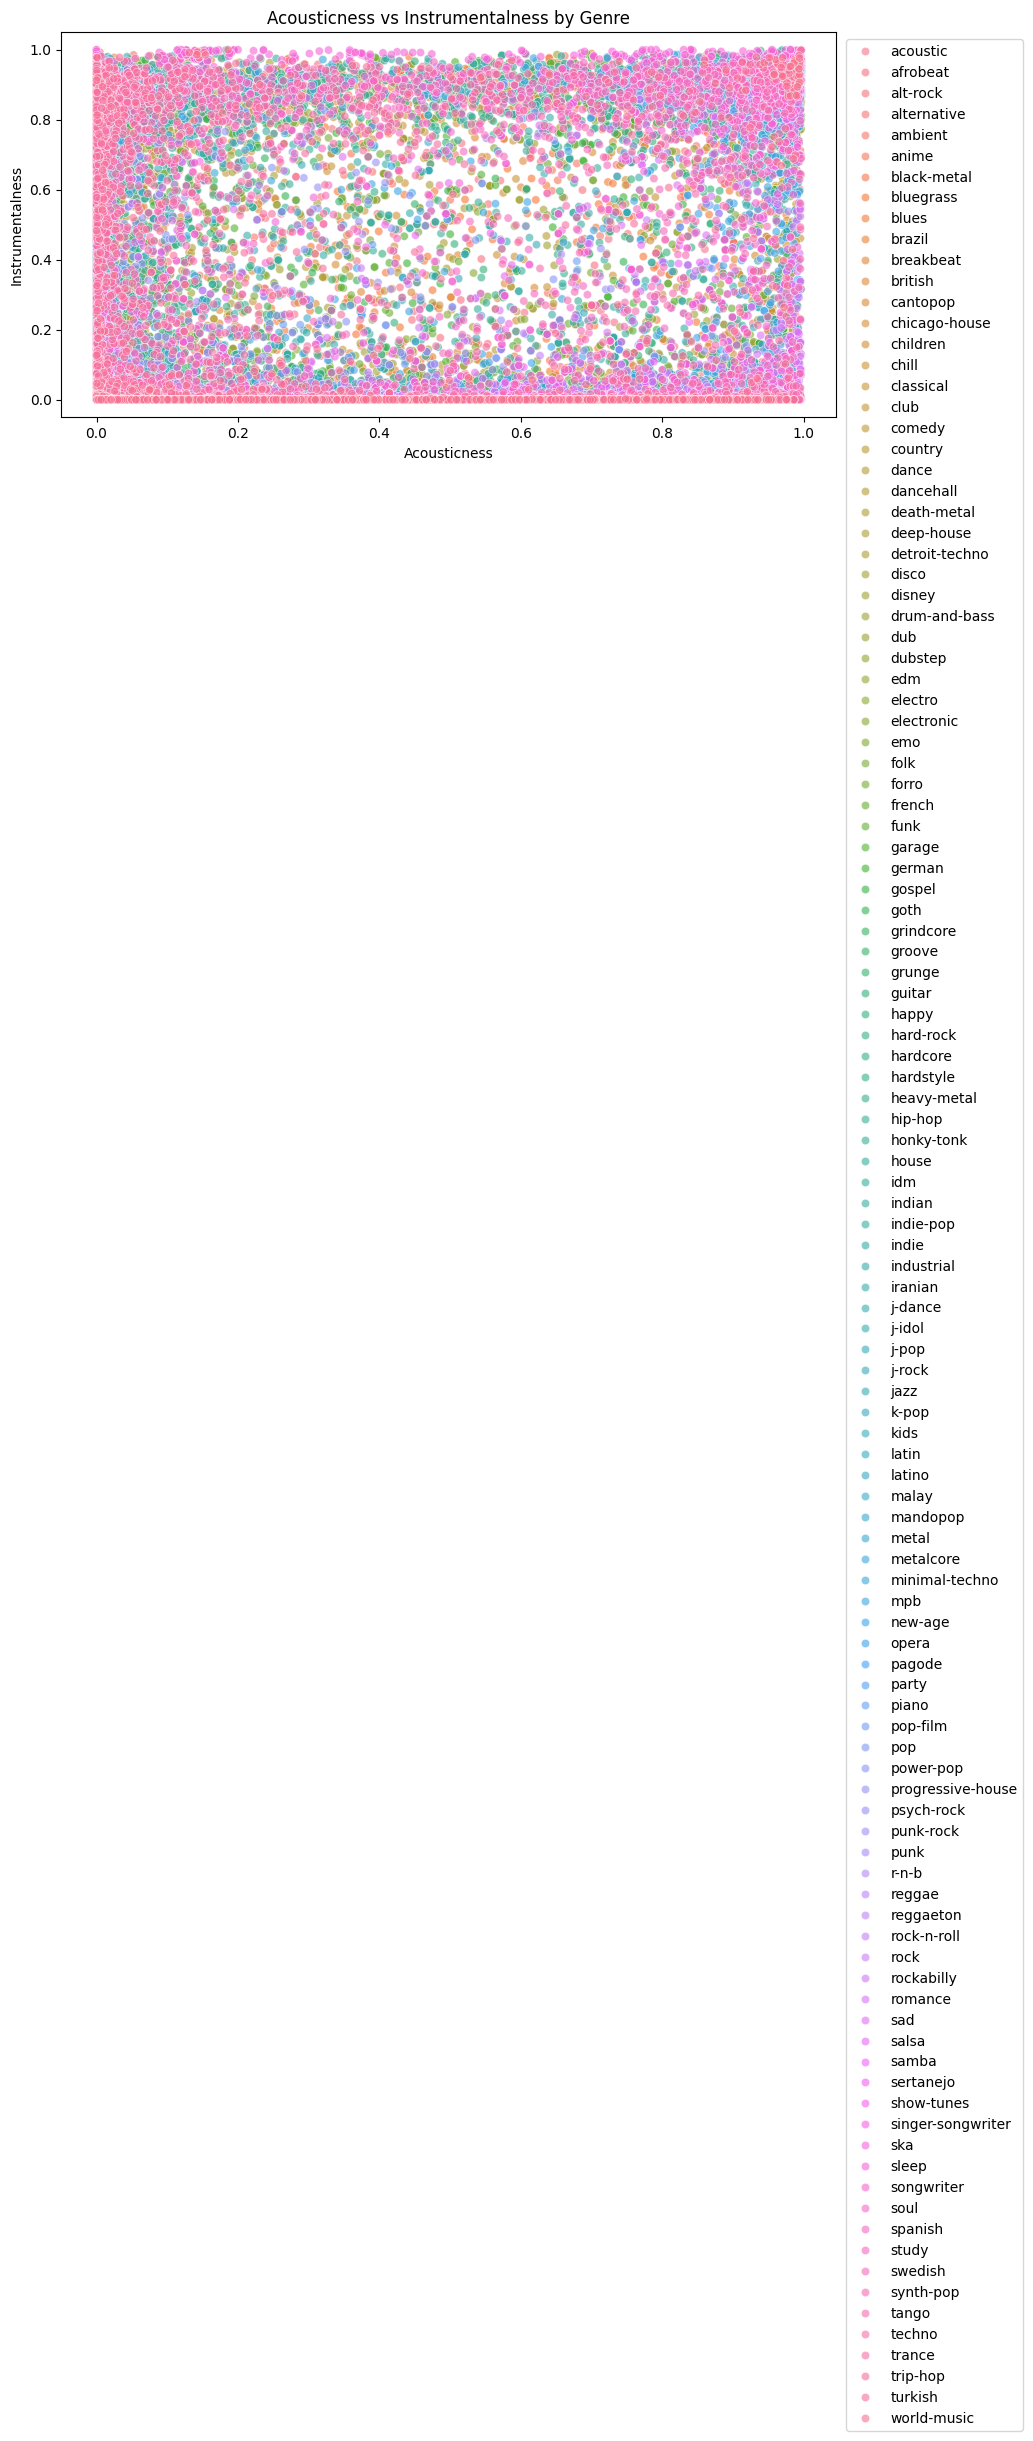

In [270]:
# Scatter plot of acousticness vs instrumentalness
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='acousticness', y='instrumentalness', hue='track_genre', alpha=0.6)
plt.title('Acousticness vs Instrumentalness by Genre')
plt.xlabel('Acousticness')
plt.ylabel('Instrumentalness')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()


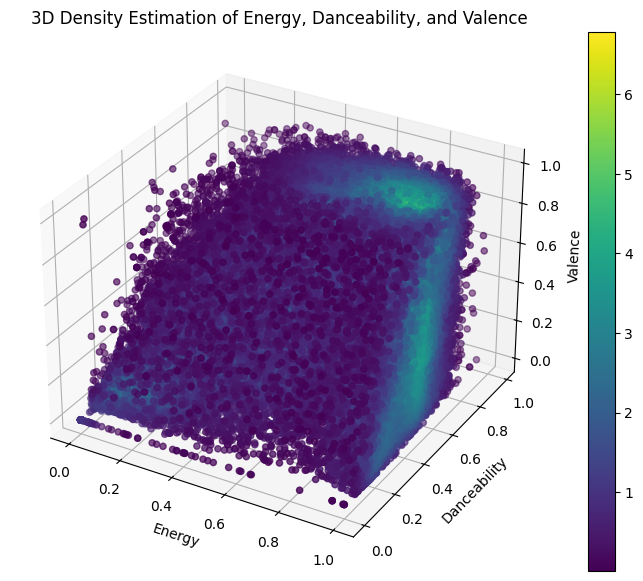

In [271]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import gaussian_kde

# Prepare the data
x = df['energy']
y = df['danceability']
z = df['valence']

# Calculate the point density
xyz = np.vstack([x, y, z])
kde = gaussian_kde(xyz)(xyz)

# Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x, y, z, c=kde, cmap='viridis')

ax.set_xlabel('Energy')
ax.set_ylabel('Danceability')
ax.set_zlabel('Valence')
plt.title('3D Density Estimation of Energy, Danceability, and Valence')
fig.colorbar(sc)
plt.show()


In [272]:
# create a feature for danceablility between 0.5 and 0.7 and energy above 0.7

df['danceable_high_energy'] = df.apply(lambda x: 1 if x['danceability'] >= 0.5 and x['danceability'] <= 0.7 and x['energy'] > 0.7 else 0, axis=1)

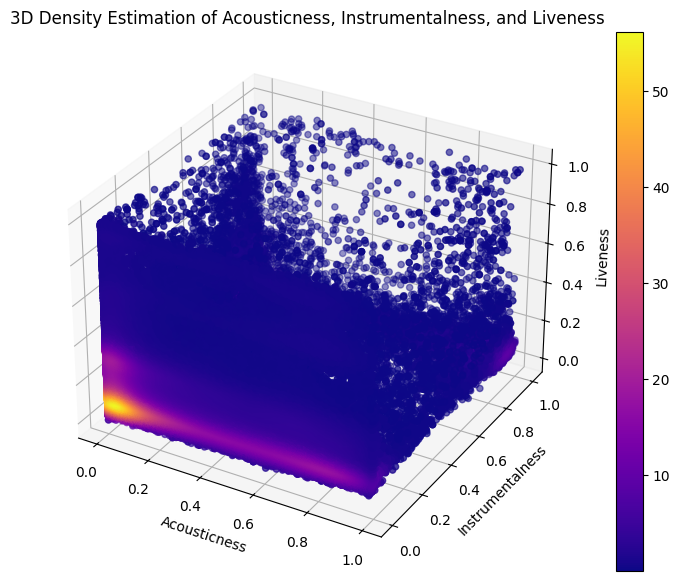

In [273]:
# Prepare the data
x = df['acousticness']
y = df['instrumentalness']
z = df['liveness']

# Calculate the point density
xyz = np.vstack([x, y, z])
kde = gaussian_kde(xyz)(xyz)

# Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x, y, z, c=kde, cmap='plasma')

ax.set_xlabel('Acousticness')
ax.set_ylabel('Instrumentalness')
ax.set_zlabel('Liveness')
plt.title('3D Density Estimation of Acousticness, Instrumentalness, and Liveness')
fig.colorbar(sc)
plt.show()


In [274]:
# create a feature for variables with low acousticness, low instrumentalness and low liveness

df['low_acoustic_instrumental_liveness'] = ((df['acousticness'] <= 0.1) & (df['instrumentalness'] <= 0.2) & (df['liveness'] <= 0.1)).astype(int)

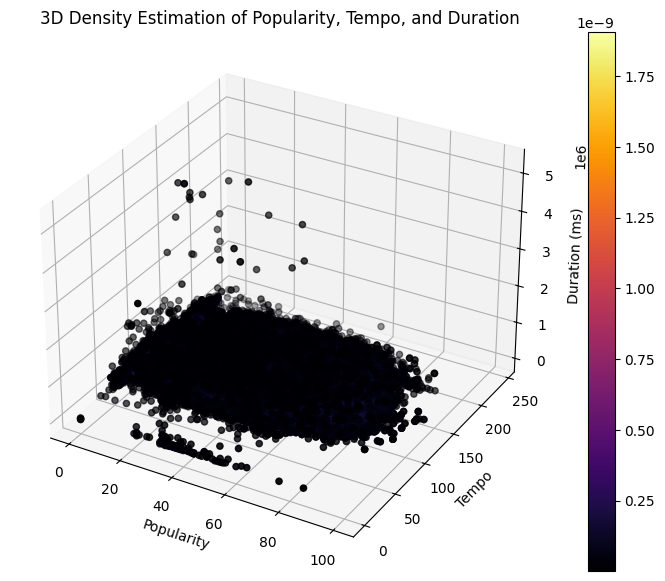

In [275]:
# Prepare the data
x = df['popularity']
y = df['tempo']
z = df['duration_ms']

# Calculate the point density
xyz = np.vstack([x, y, z])
kde = gaussian_kde(xyz)(xyz)

# Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x, y, z, c=kde, cmap='inferno')

ax.set_xlabel('Popularity')
ax.set_ylabel('Tempo')
ax.set_zlabel('Duration (ms)')
plt.title('3D Density Estimation of Popularity, Tempo, and Duration')
fig.colorbar(sc)
plt.show()


In [276]:
# use one hot encoding to encode the track_genre column

df = pd.get_dummies(df, columns=['track_genre'], drop_first=True)

# select categorical columns

categorical_columns = df.select_dtypes(include='category').columns

# convert categorical columns to one-hot encoding

df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [277]:
# outlier detection using one class SVM

# Select audio features for outlier detection

audio_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

# Standardize the data

scaler = StandardScaler()

scaled_features = scaler.fit_transform(df[audio_features])

# Apply One-Class SVM

outlier_detection = OneClassSVM(nu=0.01)

df['outlier'] = outlier_detection.fit_predict(scaled_features)

In [278]:
# df dimension
print("Shape of the dataset after outlier detection:", df.shape)

# save the new complete dataset

df.to_csv('../data/spotify_dataset_cleaned.csv', index=False)


Shape of the dataset after outlier detection: (114000, 147)


In [279]:



# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(['artists', 'track_name', 'album_name', 'track_id'], axis=1))

# Apply PCA
pca = PCA(n_components=25)
principal_components = pca.fit_transform(scaled_features)

# Create a DataFrame with the principal components
df_pca = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, 26)])

# Add the artists, track name, and album name columns
df_pca[['artists', 'track_name', 'album_name', 'track_id']] = df[['artists', 'track_name', 'album_name', 'track_id']]

# Save the PCA dataset
df_pca.to_csv('../data/spotify_dataset_pca.csv', index=False)



In [280]:
# create a dataset with the audio features only

audio_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

metadata_features = ['artists', 'track_name', 'album_name', 'track_id']

# Select the audio and meta features

df_audio = df[audio_features + metadata_features]



# Save the audio features dataset

df_audio.to_csv('../data/spotify_dataset_audio.csv', index=False)